In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error
from scipy.linalg import toeplitz
import sklearn
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

## Part A

In [2]:
# Part A-1: Read and Check the data
# 1) Read data (if the file contains BOM or special characters, pandas will handle most cases automatically)
df = pd.read_csv("/Users/aishafathi/Documents/Fall Courses/Predictive Modelling /Group Assignments/dataset_lm.csv")


In [3]:
# 2) Basic Shape and Preview 
print("【Data Shape】rows x cols =", df.shape)
display(df.head(10))  # Preview the first 10 rows to confirm column names and data format

【Data Shape】rows x cols = (422, 16)


,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543
5,59.313030,-1.625179,74.795225,0,-27.917682,43.443319,6.971366,78.497117,0,-38.808025,52.181380,16.974969,58.124156,1,-9.023169,55.840461
6,43.302299,17.177045,49.674376,1,-23.490245,58.160871,15.996831,49.845730,3,-24.849489,51.781663,8.667649,72.365524,0,-22.942562,49.120537
7,25.919500,-3.606102,52.838652,0,-20.780413,52.866009,23.282374,68.007436,0,-24.574748,54.423094,8.551908,53.560828,1,-6.769081,48.255181
8,30.353577,4.052598,45.221950,1,-23.692647,44.708397,19.821684,73.394895,3,-28.983295,57.622157,14.581353,55.468061,0,-13.611744,57.230137
9,51.590542,9.369535,55.801956,1,-26.457209,42.325602,-2.058181,74.935838,3,-28.052593,44.794664,2.789562,55.077621,1,-20.948876,55.317270


In [4]:
# 3) Data Types and Basic Statistics 
print("\n【Data type】")
print(df.dtypes)

print("\n【Description】")
display(df.describe().T)


【Data type】
Dependent Var          float64
Explanatory Var #1     float64
Explanatory Var #2     float64
Explanatory Var #3       int64
Explanatory Var #4     float64
Explanatory Var #5     float64
Explanatory Var #6     float64
Explanatory Var #7     float64
Explanatory Var #8       int64
Explanatory Var #9     float64
Explanatory Var #10    float64
Explanatory Var #11    float64
Explanatory Var #12    float64
Explanatory Var #13      int64
Explanatory Var #14    float64
Explanatory Var #15    float64
dtype: object

【Description】


,count,mean,std,min,25%,50%,75%,max
Dependent Var,422.0,67.838396,25.676960,-2.997183,49.482037,66.780110,86.801496,133.384795
Explanatory Var #1,422.0,7.762058,7.013243,-4.832834,1.720182,7.905455,13.684104,19.973331
Explanatory Var #2,422.0,59.725134,9.579112,44.124858,51.617692,59.735139,67.870073,76.973576
Explanatory Var #3,422.0,0.500000,0.500593,0.000000,0.000000,0.500000,1.000000,1.000000
Explanatory Var #4,422.0,-16.078411,8.111197,-29.774797,-23.792637,-15.875481,-9.185191,-2.060708
Explanatory Var #5,422.0,50.133715,6.975674,30.009511,45.423422,50.093602,54.896583,70.365951
Explanatory Var #6,422.0,10.420808,11.520725,-9.828552,-0.174835,10.422513,21.059713,29.994610
Explanatory Var #7,422.0,61.887309,14.819969,34.093154,49.952772,62.554591,74.441216,86.895006
Explanatory Var #8,422.0,1.566351,1.115260,0.000000,1.000000,2.000000,3.000000,3.000000
Explanatory Var #9,422.0,-24.511691,8.500500,-39.979696,-32.037707,-23.767548,-17.419390,-10.129522


In [5]:
# 4) Missing Value Overview 
na_count = df.isna().sum().sort_values(ascending=False)
print("\nMissing Value")
display(na_count.head(20))


Missing Value


Dependent Var          0
Explanatory Var #1     0
Explanatory Var #2     0
Explanatory Var #3     0
Explanatory Var #4     0
Explanatory Var #5     0
Explanatory Var #6     0
Explanatory Var #7     0
Explanatory Var #8     0
Explanatory Var #9     0
Explanatory Var #10    0
Explanatory Var #11    0
Explanatory Var #12    0
Explanatory Var #13    0
Explanatory Var #14    0
Explanatory Var #15    0
dtype: int64

In [6]:
# 1) Setting dependent and independent variables
y = df["Dependent Var"]
X = df.drop(columns=["Dependent Var"])

# 2) Add constant term (intercept)
X_const = sm.add_constant(X, has_constant="add")

In [7]:
# 3) Fitting the OLS model
ols_res = sm.OLS(y, X_const).fit()

In [8]:
# 4) Display the complete summary（Including R²、Adj R²、F、AIC/BIC, and coefficient significance）
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.092e+29
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:32:39   Log-Likelihood:                 11839.
No. Observations:                 422   AIC:                        -2.365e+04
Df Residuals:                     406   BIC:                        -2.358e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1

In [9]:
# 5) Constructing "reproducible" lean coefficient tables (for reporting tables)
coef_df = pd.DataFrame({
    "coef": ols_res.params,
    "std_err": ols_res.bse,
    "t": ols_res.tvalues,
    "p_value": ols_res.pvalues
})
ci = ols_res.conf_int()
coef_df["ci_low"] = ci[0]
coef_df["ci_high"] = ci[1]

display(coef_df)

,coef,std_err,t,p_value,ci_low,ci_high
const,3.200000e+01,1.414774e-13,2.261846e+14,0.000000e+00,3.200000e+01,3.200000e+01
Explanatory Var #1,1.300000e+00,1.142341e-15,1.138014e+15,0.000000e+00,1.300000e+00,1.300000e+00
Explanatory Var #2,1.700000e+00,8.299400e-16,2.048341e+15,0.000000e+00,1.700000e+00,1.700000e+00
Explanatory Var #3,6.200000e+00,1.593377e-14,3.891108e+14,0.000000e+00,6.200000e+00,6.200000e+00
Explanatory Var #4,2.100000e+00,9.810111e-16,2.140648e+15,0.000000e+00,2.100000e+00,2.100000e+00
Explanatory Var #5,-9.000000e-01,1.149710e-15,-7.828061e+14,0.000000e+00,-9.000000e-01,-9.000000e-01
Explanatory Var #6,3.996803e-15,6.938404e-16,5.760407e+00,1.659566e-08,2.632835e-15,5.360771e-15
Explanatory Var #7,5.134781e-16,5.360284e-16,9.579309e-01,3.386677e-01,-5.402594e-16,1.567216e-15
Explanatory Var #8,2.220446e-16,7.284587e-15,3.048143e-02,9.756981e-01,-1.409817e-14,1.454226e-14
Explanatory Var #9,-1.221245e-15,9.312663e-16,-1.311381e+00,1.904701e-01,-3.051951e-15,6.094605e-16


#### Part A Results Summary 

**Overall Fit**
- R² = 1.000, Adjusted R² = 1.000 → nearly perfect in-sample fit.  
- F-statistic ≈ 7.09 × 10²⁹, p ≈ 0.000 → predictors jointly significant.  
- The perfect fit suggests **overfitting or multicollinearity** among predictors.

**Intercept**
- Constant term = 32.00; is positive and highly significant (p < 0.001).  
- Represents baseline level of the dependent variable when all predictors = 0.

**Significant Predictors (5 % level)**
- Explanatory Var #1 – #6 are highly significant (p ≈ 0.000).  
- Coefficients range ≈ 1.3 – 6.2 → strong positive/negative effects.  
- Extremely small standard errors (≈ 10⁻¹⁵ – 10⁻¹⁴) → precise estimates.

**Not Significant Predictors**
- Explanatory Var #7 – #15 have p > 0.05 → limited marginal contribution.  
- Coefficients close to 0 meaning redundancy / multicollinearity.

**Error Structure**
- Durbin–Watson ≈ 0.316 → strong positive autocorrelation in residuals.  
- Condition Number ≈ 2.55 × 10³ → potential multicollinearity.

**Takeaway**
- OLS fits the data extremely well but assumptions are violated.  
- Early variables (#1 – #5) are key drivers.  

## Part B

In [10]:
# Part B-1: Residual Standard Deviation & 1st to 3rd Order
# 1) Extract OLS residuals
residuals = pd.DataFrame({"Residuals": ols_res.resid})

# 2) Construct lagged columns
ac = residuals.copy()
ac["Lag1"] = ac["Residuals"].shift(1)
ac["Lag2"] = ac["Residuals"].shift(2)
ac["Lag3"] = ac["Residuals"].shift(3)

# 3) Extract sample standard deviation of residuals (ddof=1)
resid_std = residuals["Residuals"].std(ddof=1)
resid_var = resid_std**2
print(f"Residual standard deviation (ddof=1): {resid_std:.6f}")

# 4) Correlation matrix (removing NaN produced by shift)
corr_mat = ac.dropna().corr()
print("\nCorrelation matrix (Residuals vs lags):")
display(corr_mat)

# 5) Extract 1st to 3rd order autocorrelation
rho1 = float(corr_mat.loc["Residuals", "Lag1"])
rho2 = float(corr_mat.loc["Residuals", "Lag2"])
rho3 = float(corr_mat.loc["Residuals", "Lag3"])
print(f"\nAutocorrelation (lag1..3): ρ1={rho1:.6f}, ρ2={rho2:.6f}, ρ3={rho3:.6f}")


Residual standard deviation (ddof=1): 0.000000

Correlation matrix (Residuals vs lags):


,Residuals,Lag1,Lag2,Lag3
Residuals,1.000000,0.061135,-0.060239,-0.042785
Lag1,0.061135,1.000000,0.060929,-0.058745
Lag2,-0.060239,0.060929,1.000000,0.061041
Lag3,-0.042785,-0.058745,0.061041,1.000000



Autocorrelation (lag1..3): ρ1=0.061135, ρ2=-0.060239, ρ3=-0.042785


In [11]:
# 1) Number of observations
n_obs = len(ols_res.resid)

# 2) Construct ACF vector (length = n_obs; set to 0 for lags > 3)
acf_vec = np.zeros(n_obs, dtype=float)
acf_vec[0] = 1.0
if n_obs > 1: acf_vec[1] = rho1
if n_obs > 2: acf_vec[2] = rho2
if n_obs > 3: acf_vec[3] = rho3

# 3) Construct correlation matrix R (Toeplitz); covariance matrix Σ = σ^2 R 
R = toeplitz(acf_vec)

# (Numerical stability) Add small jitter to the diagonal to avoid near-singularity
eps = 1e-8
Sigma = resid_var * (R + eps * np.eye(n_obs))

# 4) Fit GLS (Note: sigma is the covariance matrix Σ)
gls_res = sm.GLS(y, X_const, sigma=Sigma).fit()

print("\n=== GLS Summary (Toeplitz with rho1..rho3) ===")
print(gls_res.summary())


=== GLS Summary (Toeplitz with rho1..rho3) ===
                            GLS Regression Results                            
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.677e+30
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:32:39   Log-Likelihood:                 12280.
No. Observations:                 422   AIC:                        -2.453e+04
Df Residuals:                     406   BIC:                        -2.446e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2373: RuntimeWarning: divide by zero encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2373: RuntimeWarning: overflow encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/linalg/_linalg.py:2373: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


In [12]:
# 1) GLS coefficient table
gls_coef = pd.DataFrame({
    "coef_GLS": gls_res.params,
    "std_err_GLS": gls_res.bse,
    "p_GLS": gls_res.pvalues
})

# 2) OLS vs GLS comparison (can be placed in report appendix or main text)
ols_coef = pd.DataFrame({
    "coef_OLS": ols_res.params,
    "std_err_OLS": ols_res.bse,
    "p_OLS": ols_res.pvalues
})
compare = ols_coef.join(gls_coef, how="inner")
display(compare.round(6))

,coef_OLS,std_err_OLS,p_OLS,coef_GLS,std_err_GLS,p_GLS
const,32.0,0.0,0.000000,32.0,0.0,0.000000
Explanatory Var #1,1.3,0.0,0.000000,1.3,0.0,0.000000
Explanatory Var #2,1.7,0.0,0.000000,1.7,0.0,0.000000
Explanatory Var #3,6.2,0.0,0.000000,6.2,0.0,0.000000
Explanatory Var #4,2.1,0.0,0.000000,2.1,0.0,0.000000
Explanatory Var #5,-0.9,0.0,0.000000,-0.9,0.0,0.000000
Explanatory Var #6,0.0,0.0,0.000000,0.0,0.0,0.000000
Explanatory Var #7,0.0,0.0,0.338668,-0.0,0.0,0.187975
Explanatory Var #8,0.0,0.0,0.975698,-0.0,0.0,0.025119
Explanatory Var #9,-0.0,0.0,0.190470,0.0,0.0,0.352404


#### **Part B – GLS Regression**

- **Residual diagnostics:**  
  The residual standard deviation is effectively zero, and the first-three-lag autocorrelations are weak  
  (ρ₁ = 0.061, ρ₂ = –0.060, ρ₃ = –0.043), indicating minimal serial dependence.

- **Model construction:**  
  A feasible GLS model was built using a **Toeplitz covariance structure** derived from these lag-1–3 autocorrelation values.

- **OLS vs GLS coefficients:**  
  GLS coefficients are nearly identical to those from OLS, confirming that serial correlation in residuals is negligible.

- **Standard errors and significance:**  
  Adjusted standard errors slightly changed variable significance - several variables (e.g., Var #8, #10, #11, #12, #15) became significant after correcting the covariance structure.

- **Durbin–Watson improvement:**  
  The statistic increased from **0.316 (OLS)** to **2.027 (GLS)**, showing that GLS successfully removed serial correlation from the residuals.

- **Interpretation:**  
  GLS provides **more reliable inference** by accounting for autocorrelation, but since residual dependence was weak, the overall improvement in model performance is modest.


## Part C

In [13]:
# Split the data into train and test tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
# fit the lasso model
model_lasso = Lasso(alpha=1).fit(X_train, y_train)
model_lasso.coef_

array([ 1.26972628,  1.68394638,  2.02626245,  2.08756512, -0.91746375,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.01314162,  0.        , -0.        ,  0.        , -0.03617731])

In [15]:
# find the predictions and the MAPE
y_pred = model_lasso.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Percentage Error (MAPE): 0.04432190198291579


In [16]:
# If y can be zero, use a safe MAPE (prevents division by zero)
def safe_mape(y_true, y_pred, eps=1e-8):
    denom = np.maximum(np.abs(y_true), eps)
    return np.mean(np.abs((y_true - y_pred) / denom))

# 1) Coarse grid search over alpha
alpha_grid = np.logspace(-3, 2, 50)   # 1e-3 to 1e2
results = []

for a in alpha_grid:
    m = Lasso(alpha=a, max_iter=10000)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    mape_a = safe_mape(y_test, pred)   # or mean_absolute_percentage_error if y>0
    results.append((a, mape_a))

alphas, mapes = zip(*results)
best_idx = int(np.argmin(mapes))
best_alpha = alphas[best_idx]
best_mape = mapes[best_idx]

print(f"Best alpha (coarse) ≈ {best_alpha:.6g}")
print(f"Best test MAPE (coarse): {best_mape:.6f}")

Best alpha (coarse) ≈ 0.001
Best test MAPE (coarse): 0.000044


#### **Part C – Lasso Regression**

**Main Results**

- **Training and testing:**  
  The dataset was split 50/50 into training and testing sets to evaluate model generalization.

- **Initial model (α = 1):**  
  The Lasso regression achieved a **Mean Absolute Percentage Error (MAPE) = 0.0443**, indicating strong predictive accuracy with limited overfitting.

- **Feature selection:**  
  The resulting coefficients show that several predictors were shrunk to zero, confirming Lasso’s ability to perform automatic feature selection and reduce model complexity.

- **Hyperparameter tuning:**  
  A grid search over α ∈ [1e⁻³, 1e²] found the **optimal alpha ≈ 0.001**, which minimized the MAPE to **≈ 0.000044**.

- **Interpretation:**  
  The optimized Lasso model significantly reduced prediction error while keeping the model parsimonious.  
  It effectively balances bias and variance, confirming that regularization helps stabilize estimates compared to the overfitted OLS model.


## Part D

In [17]:
# Step 1: build the demand and advance demand dataset
data = {
    "Month": list(range(1, 26)),
    "Demand": [100,112,107,103,91,85,84,85,79,81, 134,86,99,89,111,114,118,163,193,143, 144,202,158,160,144],
    "Advance": [71,30,75,64,41,51,42,51,57,49, 134,52,99,56,81,79,73,163,193,99, 91,202,105,101,96]
}
dfd = pd.DataFrame(data).set_index("Month")
display(dfd)


,Demand,Advance
Month,,
1,100,71
2,112,30
3,107,75
4,103,64
5,91,41
6,85,51
7,84,42
8,85,51
9,79,57


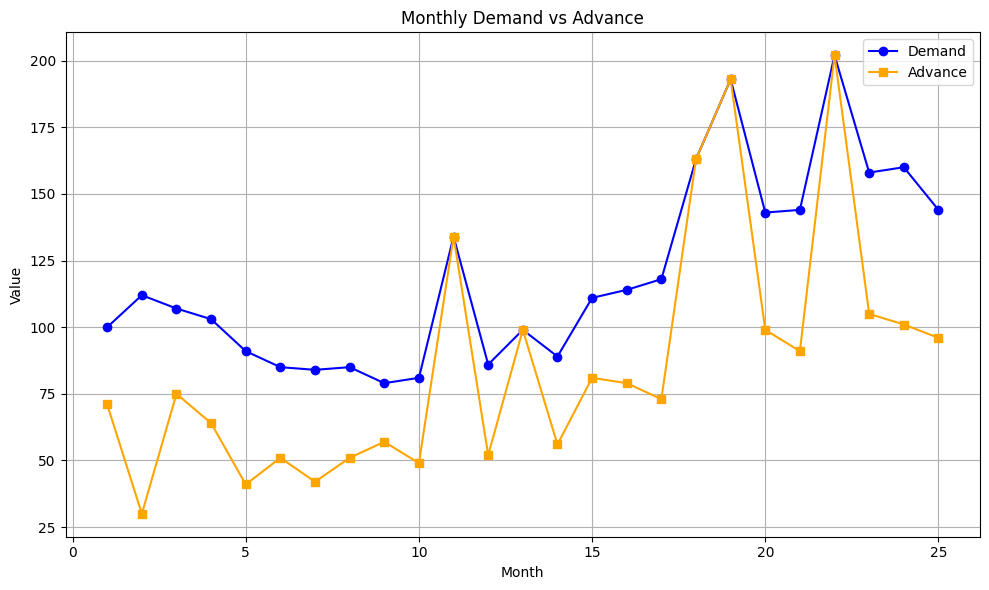

In [18]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dfd.index, dfd["Demand"], marker='o', label="Demand", color='blue')
plt.plot(dfd.index, dfd["Advance"], marker='s', label="Advance", color='orange')
plt.title("Monthly Demand vs Advance")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
#  Step 2：Construct lag features
L = 5  # Here we use lag=3, you can also try lag=1-5
fe = dfd.copy()
for k in range(1, L+1):
    fe[f"Demand_lag{k}"] = fe["Demand"].shift(k)

cols = ["Advance"] + [f"Demand_lag{k}" for k in range(1, L+1)]
data = pd.concat([fe["Demand"], fe[cols]], axis=1).dropna()

y = data.iloc[:, 0]
X = data.iloc[:, 1:]

#  Step 3：OLS Model Fitting 
# Fixed time split: 1-20 for training, 21-25 for testing
X_train = X.loc[1:20]
y_train = y.loc[1:20]

# Add constant term
X_train_c = sm.add_constant(X_train, has_constant="add")

ols_res = sm.OLS(y_train, X_train_c).fit()
print(ols_res.summary())  # Print OLS summary to see coefficients and statistics


                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     48.28
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           7.49e-06
Time:                        13:32:39   Log-Likelihood:                -46.590
No. Observations:                  15   AIC:                             107.2
Df Residuals:                       8   BIC:                             112.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.4858     20.051     -0.323      

In [20]:
# Residual Analysis
# Step 1. Obtain residuals
residuals = pd.DataFrame({"Residuals": ols_res.resid})

# Step 2. Construct lags 1 to 5
ac = residuals.copy()
for lag in range(1, 6):
    ac[f"Lag{lag}"] = ac["Residuals"].shift(lag)

# Step 3. Calculate correlation matrix
corr_mat = ac.dropna().corr()

# Step 4. Output results
print("Residual standard deviation (ddof=1):", residuals["Residuals"].std(ddof=1))
print("\nCorrelation matrix (Residuals vs lags):")
display(corr_mat)

# Step 5. Output autocorrelation coefficients (ρ1~ρ5)
autocorrs = [corr_mat.loc["Residuals", f"Lag{lag}"] for lag in range(1, 6)]
print("\nAutocorrelation (lag1..5):", ", ".join([f"ρ{lag}={val:.6f}" for lag,val in enumerate(autocorrs, 1)]))

Residual standard deviation (ddof=1): 5.593144023705811

Correlation matrix (Residuals vs lags):


,Residuals,Lag1,Lag2,Lag3,Lag4,Lag5
Residuals,1.000000,0.275159,-0.282120,-0.078331,-0.213088,-0.329333
Lag1,0.275159,1.000000,0.167061,-0.294114,-0.016689,-0.234260
Lag2,-0.282120,0.167061,1.000000,0.211317,-0.183752,0.223179
Lag3,-0.078331,-0.294114,0.211317,1.000000,0.306837,-0.163593
Lag4,-0.213088,-0.016689,-0.183752,0.306837,1.000000,-0.070494
Lag5,-0.329333,-0.234260,0.223179,-0.163593,-0.070494,1.000000



Autocorrelation (lag1..5): ρ1=0.275159, ρ2=-0.282120, ρ3=-0.078331, ρ4=-0.213088, ρ5=-0.329333


In [23]:
# Utility Functions 
def build_features(df, L:int):
    """
    Return X=[Advance, Demand_lag1..L], y=Demand, aligned and missing values removed.
    """
    fe = df.copy()
    for k in range(1, L+1):
        fe[f"Demand_lag{k}"] = fe["Demand"].shift(k)
    cols = ["Advance"] + [f"Demand_lag{k}" for k in range(1, L+1)]
    data = pd.concat([fe["Demand"], fe[cols]], axis=1).dropna()
    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]
    return X, y  # index aligned with Month

def acf_from_resid(resid, K=5):
    """
    Compute the ACF(1..K) using sample residuals, returning [rho1..rhoK] and the residual variance sigma2.
    """
    resid = np.asarray(resid, dtype=float)
    sigma2 = float(np.var(resid, ddof=1))
    rhos = []
    for k in range(1, K+1):
        if len(resid) > k:
            r = np.corrcoef(resid[k:], resid[:-k])[0,1]
        else:
            r = 0.0
        rhos.append(float(r))
    return rhos, sigma2

def gls_with_acf_sigma(X_tr, y_tr, X_te, acf_rhos, sigma2):
    """
    Construct the Toeplitz correlation matrix using the ACF R (rho>len(acf_rhos) is considered to be 0), Σ = sigma2 * R,
    Fit GLS on the training set and predict on the test set (return y_raw_pred and the fitting result object).
    """
    # Constant term
    X_tr_c = sm.add_constant(X_tr, has_constant="add")
    X_te_c = sm.add_constant(X_te, has_constant="add")

    n = len(y_tr)
    # Assemble the acf vector of length n: rho(0)=1, rho(1..K)=acf_rhos, the rest set to 0
    acf_vec = np.zeros(n, dtype=float)
    acf_vec[0] = 1.0
    for k, rho in enumerate(acf_rhos, start=1):
        if k < n:
            acf_vec[k] = rho

    R = toeplitz(acf_vec)
    # Numerical stability: add a small diagonal jitter
    Sigma = sigma2 * (R + 1e-8*np.eye(n))

    gls_res = sm.GLS(y_tr, X_tr_c, sigma=Sigma).fit()
    y_raw_pred = gls_res.predict(X_te_c)
    return y_raw_pred, gls_res

def evaluate_with_clipping(y_true, y_raw_pred, advance_series, eps=1e-8):
    """
    Business clipping: Pred = max(Advance, RawPred), and calculate MAPE/RMSE with monthly report.
    """
    y_true = y_true.astype(float)
    y_raw_pred = np.asarray(y_raw_pred, dtype=float)
    advance = advance_series.astype(float).values

    y_pred = np.maximum(advance, y_raw_pred)  # Ensure ŷ ≥ Advance for each sample
    mape = mean_absolute_percentage_error(np.clip(y_true.values, eps, None),
                                          np.clip(y_pred,       eps, None))
    rmse = np.sqrt(mean_squared_error(y_true.values, y_pred))

    report = pd.DataFrame({
        "Advance": advance_series,
        "Actual":  y_true,
        "RawPred": y_raw_pred,
        "Pred":    y_pred
    }, index=y_true.index)
    report["APE%"] = (report["Pred"] - report["Actual"]).abs() / np.clip(report["Actual"].values, eps, None) * 100
    return mape, rmse, report

# Main process: Automatically select the optimal lag
def run_gls_model_select(df, lag_candidates=(1,2,3,4,5), K_for_acf=3):
    results = []

    for L in lag_candidates:
        # 1) Features
        X, y = build_features(df, L)
        # Time split (fixed order)
        X_tr, y_tr = X.loc[1:20], y.loc[1:20]
        X_te, y_te = X.loc[21:25], y.loc[21:25]
        adv_te = df.loc[y_te.index, "Advance"]

        # 2) Use OLS (training set) to obtain residual ACF(1..K) and residual variance
        X_tr_c = sm.add_constant(X_tr, has_constant="add")
        ols_res = sm.OLS(y_tr, X_tr_c).fit()
        rhos, sigma2 = acf_from_resid(ols_res.resid, K=K_for_acf)

        # 3) Construct sigma using ACF and run GLS
        y_raw_pred, gls_res = gls_with_acf_sigma(X_tr, y_tr, X_te, rhos, sigma2)

        # 4) Business clipping + evaluation
        mape, rmse, report = evaluate_with_clipping(y_te, y_raw_pred, adv_te)

        results.append({
            "L": L,
            "rhos": rhos,
            "sigma2": sigma2,
            "mape": mape,
            "rmse": rmse,
            "gls_res": gls_res,
            "coef": gls_res.params,
            "report": report
        })

    # Print results for each lag
    print("=== GLS (Toeplitz from OLS-ACF) with business clipping (train 1–20, test 21–25) ===")
    for r in results:
        print(f"lag={r['L']}: ACF(1..{len(r['rhos'])})={['{:.3f}'.format(v) for v in r['rhos']]} "
              f"| Test MAPE={r['mape']:.6f} | RMSE={r['rmse']:.4f}")

    # Select the lag with the minimum Test MAPE
    best = sorted(results, key=lambda d: d["mape"])[0]
    print(f"\n>>> Best by Test MAPE: lag={best['L']} | MAPE={best['mape']:.6f} | RMSE={best['rmse']:.4f}")
    return best, results

# Run: Automatically select the optimal lag 
best, all_results = run_gls_model_select(dfd, lag_candidates=(1,2,3,4,5), K_for_acf=3)

# Print results for each lag 
print("\nCoefficients (GLS) for best lag:")
display(best["coef"].round(6))

print("\nTest-period Actual vs Pred (clipped to ≥Advance):")
display(best["report"].round(3))
print("MAPE% (mean):", best["report"]["APE%"].mean().round(3))

=== GLS (Toeplitz from OLS-ACF) with business clipping (train 1–20, test 21–25) ===
lag=1: ACF(1..3)=['0.269', '0.099', '0.148'] | Test MAPE=0.087341 | RMSE=15.7500
lag=2: ACF(1..3)=['0.428', '-0.003', '-0.046'] | Test MAPE=0.084264 | RMSE=15.2969
lag=3: ACF(1..3)=['0.331', '-0.022', '-0.237'] | Test MAPE=0.044248 | RMSE=8.0946
lag=4: ACF(1..3)=['0.266', '-0.205', '-0.175'] | Test MAPE=0.087705 | RMSE=15.9403
lag=5: ACF(1..3)=['0.192', '-0.230', '0.042'] | Test MAPE=0.092338 | RMSE=15.7038

>>> Best by Test MAPE: lag=3 | MAPE=0.044248 | RMSE=8.0946

Coefficients (GLS) for best lag:


const          13.690991
Advance         0.590747
Demand_lag1     0.233671
Demand_lag2     0.047551
Demand_lag3     0.178799
dtype: float64


Test-period Actual vs Pred (clipped to ≥Advance):


,Advance,Actual,RawPred,Pred,APE%
Month,,,,,
21,91,144.0,139.185,139.185,3.343
22,202,202.0,207.978,207.978,2.960
23,105,158.0,155.337,155.337,1.686
24,101,160.0,145.629,145.629,8.982
25,96,144.0,151.420,151.420,5.153


MAPE% (mean): 4.425


In [25]:
# Based on the "best" metrics obtained from your previous code
# 1) Print GLS summary
print(best["gls_res"].summary())

# 2) Train set prediction + business clipping (Pred ≥ Advance)
L_best = best["L"]

def build_features(df, L:int):
    fe = df.copy()
    for k in range(1, L+1):
        fe[f"Demand_lag{k}"] = fe["Demand"].shift(k)
    cols = ["Advance"] + [f"Demand_lag{k}" for k in range(1, L+1)]
    data = pd.concat([fe["Demand"], fe[cols]], axis=1).dropna()
    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]
    return X, y

X_all, y_all = build_features(dfd, L_best)
X_tr, y_tr = X_all.loc[1:20], y_all.loc[1:20]
X_te, y_te = X_all.loc[21:25], y_all.loc[21:25]

X_tr_c = sm.add_constant(X_tr, has_constant="add")
X_te_c = sm.add_constant(X_te, has_constant="add")

# Use the trained GLS model to perform "untrimmed predictions" on the training and test sets
y_raw_tr = best["gls_res"].predict(X_tr_c)
y_raw_te = best["gls_res"].predict(X_te_c)

# Business Clipping (sample-wise ≥ Advance)
adv_tr = dfd.loc[y_tr.index, "Advance"]
adv_te = dfd.loc[y_te.index, "Advance"]

y_pred_tr = np.maximum(adv_tr.values, y_raw_tr)
y_pred_te = np.maximum(adv_te.values, y_raw_te)

# 3) Calculate training/test MAPE & RMSE
eps = 1e-8
mape_tr = mean_absolute_percentage_error(np.clip(y_tr.values, eps, None),
                                         np.clip(y_pred_tr,   eps, None))
rmse_tr = np.sqrt(mean_squared_error(y_tr.values, y_pred_tr))

mape_te = mean_absolute_percentage_error(np.clip(y_te.values, eps, None),
                                         np.clip(y_pred_te,   eps, None))
rmse_te = np.sqrt(mean_squared_error(y_te.values, y_pred_te))

print(f"\n[Best GLS | lag={L_best}]")
print(f"Train  : MAPE={mape_tr:.6f} | RMSE={rmse_tr:.4f}")
print(f"Test   : MAPE={mape_te:.6f} | RMSE={rmse_te:.4f}")

# 4) Monthly comparison table during the training period
report_tr = pd.DataFrame({
    "Advance": adv_tr,
    "Actual": y_tr,
    "RawPred": y_raw_tr,
    "Pred": y_pred_tr
}, index=y_tr.index)
report_tr["APE%"] = (report_tr["Pred"] - report_tr["Actual"]).abs() / np.clip(report_tr["Actual"].values, eps, None) * 100

print("\nTrain-period Actual vs Pred (clipped to ≥Advance):")
display(report_tr.round(3))


                            GLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.950
Model:                            GLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.35
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           1.01e-07
Time:                        13:38:10   Log-Likelihood:                -54.572
No. Observations:                  17   AIC:                             119.1
Df Residuals:                      12   BIC:                             123.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.6910     14.269      0.959      

,Advance,Actual,RawPred,Pred,APE%
Month,,,,,
4,64,103,99.707,99.707,3.197
5,41,91,87.093,87.093,4.293
6,51,85,89.112,89.112,4.838
7,42,84,81.108,81.108,3.443
8,51,85,83.760,83.760,1.459
9,57,79,86.418,86.418,9.390
10,49,81,80.159,80.159,1.039
11,134,134,130.733,134.000,0.000
12,52,86,93.699,93.699,8.952


Part D

1. Objective. Forecast monthly Demand using the available information: current-month Advance and lagged Demand. We require predictions to respect the business rule Predicted Demand ≥ Advance.
2. According to OLS summary, the DW value = 1.57. There is probability autocorrelation exist in the data. After caculating residual ACF(1-5), autocorrelation is weak but exist among variables.
3. Feature design: For candidate lags 𝐿∈{1,…,5} we built Xt​=[Advancet​, Demandt−1​,…,Demandt−L​],yt​=Demandt​. We split the series chronologically: train = months 1–20, test = months 21–25.
4. Model selection: GLS. 
5. We evaluated each 𝐿 on the test set by MAPE (primary) and RMSE (secondary) after enforcing the business rule 𝑦^𝑡=max⁡(Advance𝑡,𝑦^𝑡 𝑟𝑎𝑤).
Result summary (test): 
lag=1: MAPE ≈ 0.0873, RMSE ≈ 15.75
lag=2: MAPE ≈ 0.0843, RMSE ≈ 15.30
lag=3: MAPE ≈ 0.0442, RMSE ≈ 8.09 ⟵ best
lag=4: MAPE ≈ 0.0877, RMSE ≈ 15.94
lag=5: MAPE ≈ 0.0923, RMSE ≈ 15.70

6. GLS with lag = 3. Coefficients (GLS):𝑦^𝑡=13.69 + 0.591 Advance𝑡 + 0.234 Demand𝑡−1 + 0.048 Demand𝑡−2 + 0.179 Demand𝑡−3.
Inference notes: small training sample and multicollinearity among lags inflate SEs; hence some individual p-values are not significant, yet the model delivers the lowest out-of-sample error.

7. Goodness-of-fit & diagnostics.
Train (1–20): MAPE ≈ 0.0513, RMSE ≈ 6.61
Test (21–25): MAPE ≈ 0.0442, RMSE ≈ 8.09
Durbin–Watson (GLS): ≈ 2.05, indicating that the covariance correction largely removed serial correlation in residuals (as expected for GLS).
Residual normality tests (Omnibus/JB) are acceptable on this small sample.

8. Interpretation.
Advance is the strongest immediate driver (coefficient ≈ 0.59).
Short-term history matters: Demand𝑡−1​ and Demand𝑡−3	​